<a href="https://colab.research.google.com/github/Kumarinishu/Nishu-Kumari-Machine-Learning-Intern-YBI/blob/main/Used_car_price_detection_Nishu_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: **NISHU KUMARI**
# YBI FOUNDATION '**MACHINE LEARNING INTERN**'
### Batch: 18th July
### Project6: Used Car Price Prediction Using Linear Regression Machine Learning Algorithm
### Dataset Link: https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1

### Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error

### Reading the dataset

In [2]:
df=pd.read_csv('/content/sample_data/UsedCarPrice.csv')
df

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
df.head(10)

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
df.shape

(4340, 9)

In [5]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df['Brand'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [7]:
df['Selling_Price'].value_counts()

300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: Selling_Price, Length: 445, dtype: int64

In [8]:
df['Fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [10]:
df.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.nunique(axis=0) #no of unique values in each column

Brand              29
Model            1491
Year               27
Selling_Price     445
KM_Driven         770
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64

In [12]:
corr=df.corr() #to find correlation
corr

,Year,Selling_Price,KM_Driven
Year,1.000000,0.413922,-0.419688
Selling_Price,0.413922,1.000000,-0.192289
KM_Driven,-0.419688,-0.192289,1.000000


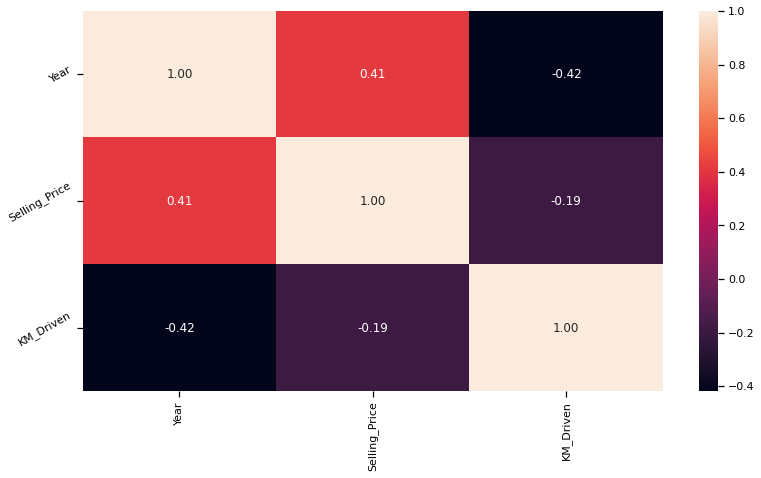

In [13]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [14]:
df.describe(include='all')

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
count,4340,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,29,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,1280,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


### EXPLORATORY DATA ANALYSIS
After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target feature.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 4.892021
Kurtosis: 37.087543


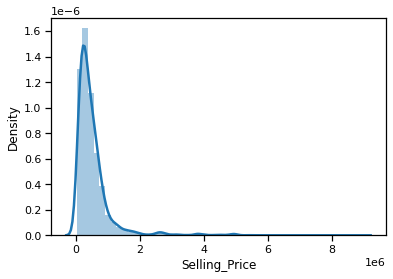

In [15]:
sns.distplot(df['Selling_Price'])

print("Skewness: %f" % df['Selling_Price'].skew())
print("Kurtosis: %f" % df['Selling_Price'].kurt())

#### We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 37 is very high, meaning that there is a profusion of outliers in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


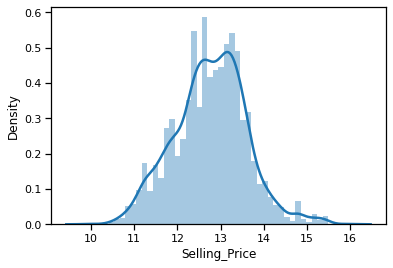

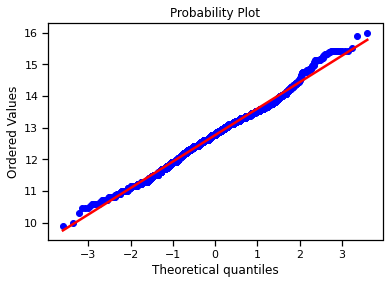

In [16]:
from scipy import stats
#applying log transformation
df['Selling_Price'] = np.log(df['Selling_Price'])
#transformed histogram and normal probability plot
#sns.distplot(df['Selling_Price'])
sns.distplot(df['Selling_Price'], fit=None)
fig = plt.figure()
res = stats.probplot(df['Selling_Price'], plot=plt)

We found that converting the value of Selling_Price to Log(Selling_Price) might be a good solution to have a more normal visualization of the distribution of the Selling_Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

### RELATIONSHIP OF SELLING_PRICE WITH OTHER PARAMETER

In [17]:
# Find most important features relative to target Price
print('Find most important features relative to Selling_Price-target')
corr = df.corr()
corr.sort_values(['Selling_Price'], ascending = False, inplace = True)
print(corr.Selling_Price)

Find most important features relative to Selling_Price-target
Selling_Price    1.000000
Year             0.695723
KM_Driven       -0.242700
Name: Selling_Price, dtype: float64


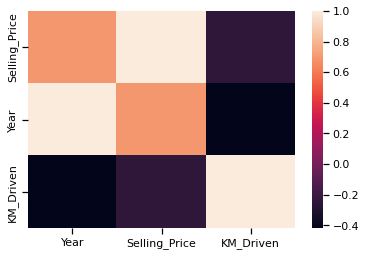

In [18]:
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


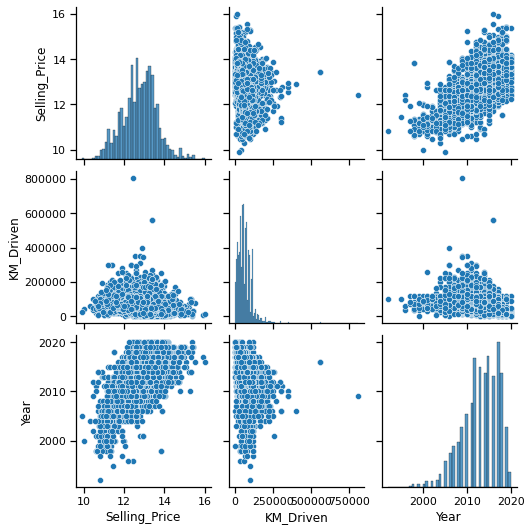

In [19]:
num_features=['Selling_Price','KM_Driven','Year']
sns.pairplot(df[num_features],size=2.5)
plt.show()

In [20]:
import plotly.express as px
px.treemap(df.groupby(by='Fuel').sum().reset_index(), path=['Fuel'], labels='Fuel', 
           values='Selling_Price', title='Selling_Price vs Fuel')

Wow, Diesel vehicles are the majority, NOT petrole cars.

In [21]:
yprop = 'Selling_Price'
xprop = 'Year'
h= 'Fuel'
px.scatter(df, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

Yeah ! "New" cars are more expensive than "Old" cars, and Automatic cars are more costly.

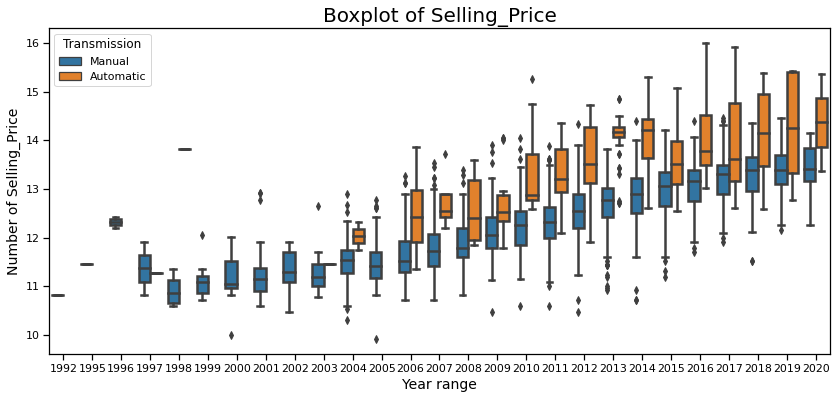

In [22]:
plt.figure(figsize=(14,6))
xprop = 'Year'
yprop = 'Selling_Price'
sns.boxplot(data=df, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [23]:
yprop = 'Selling_Price'
xprop = 'Year'
h= 'Owner'
px.scatter(df, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
#fig.update_layout(xaxis_range=[0,5e5])

It's quite BIZZA that, the THIRD OWNER' CARS are sometime less expensive than the second-hand :)

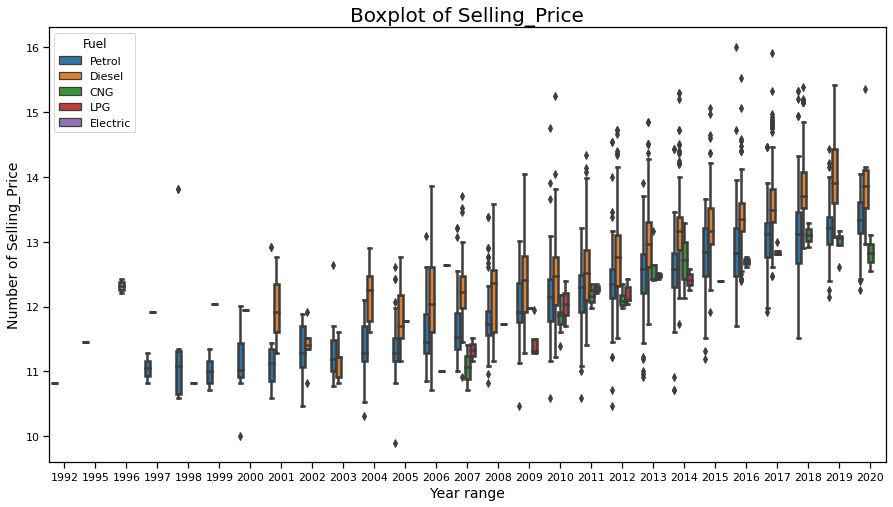

In [24]:
plt.figure(figsize=(15,8))
xprop = 'Year'
yprop = 'Selling_Price'
sns.boxplot(data=df, x=xprop, y=yprop, hue='Fuel')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [25]:
fig = px.box(df, x='Fuel',y='Selling_Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

Again, this confirmed that the Petrol vehicle is cheaper than the Diesel.

In [26]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df['Fuel'], values=df['Selling_Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

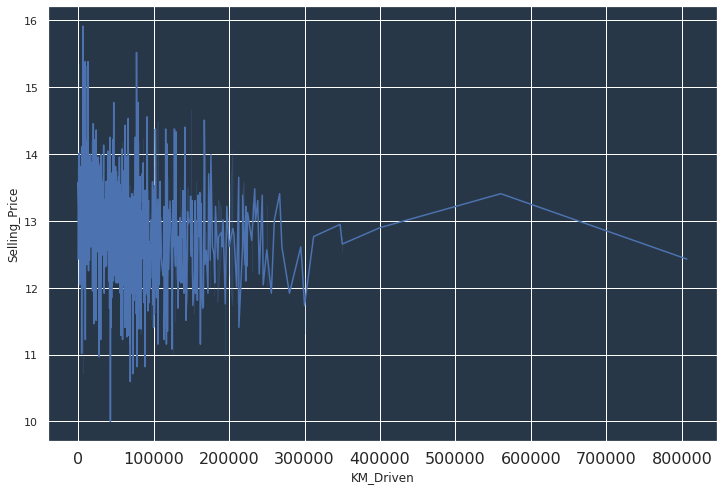

In [27]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='KM_Driven',y='Selling_Price',data=df)

From above graph we can say that there is not much relationship between KM_Driven and Selling_Price

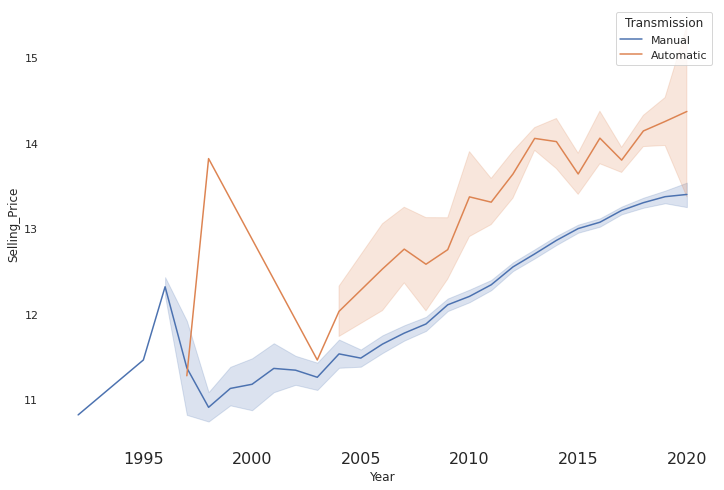

In [28]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='Year',y='Selling_Price',data=df,hue='Transmission')

From the above figure we can observe the variation in Selling_Price of cars of two Transmission categories in relation to their manufacturing year.

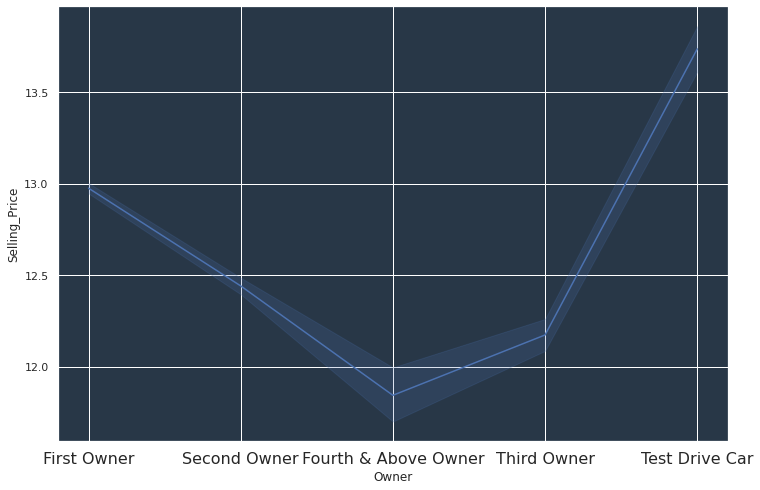

In [29]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='Owner',y='Selling_Price',data=df)

From the above figure we can observe the variability in Selling_Price of cars of two transmission categories in relation to their Owner.We can see if Owner are more the price of that car is generally less

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



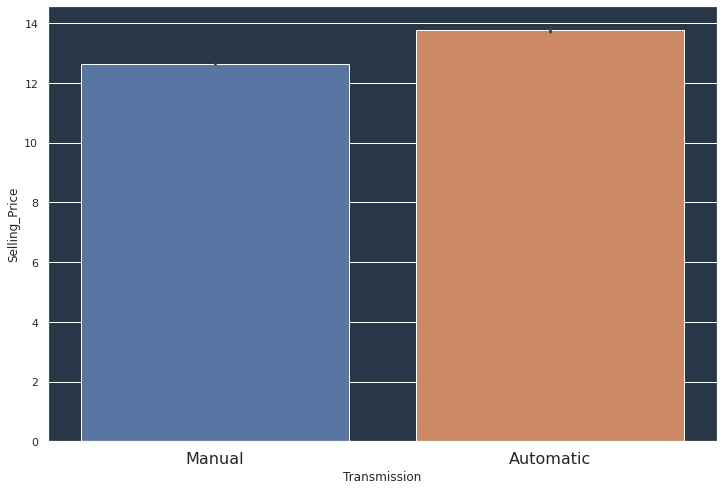

In [30]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['Transmission'],df['Selling_Price'])

We can observe that mean for automatic cars is more and its value is 
2.8. Inter quartile range is 2.7-2.8

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:

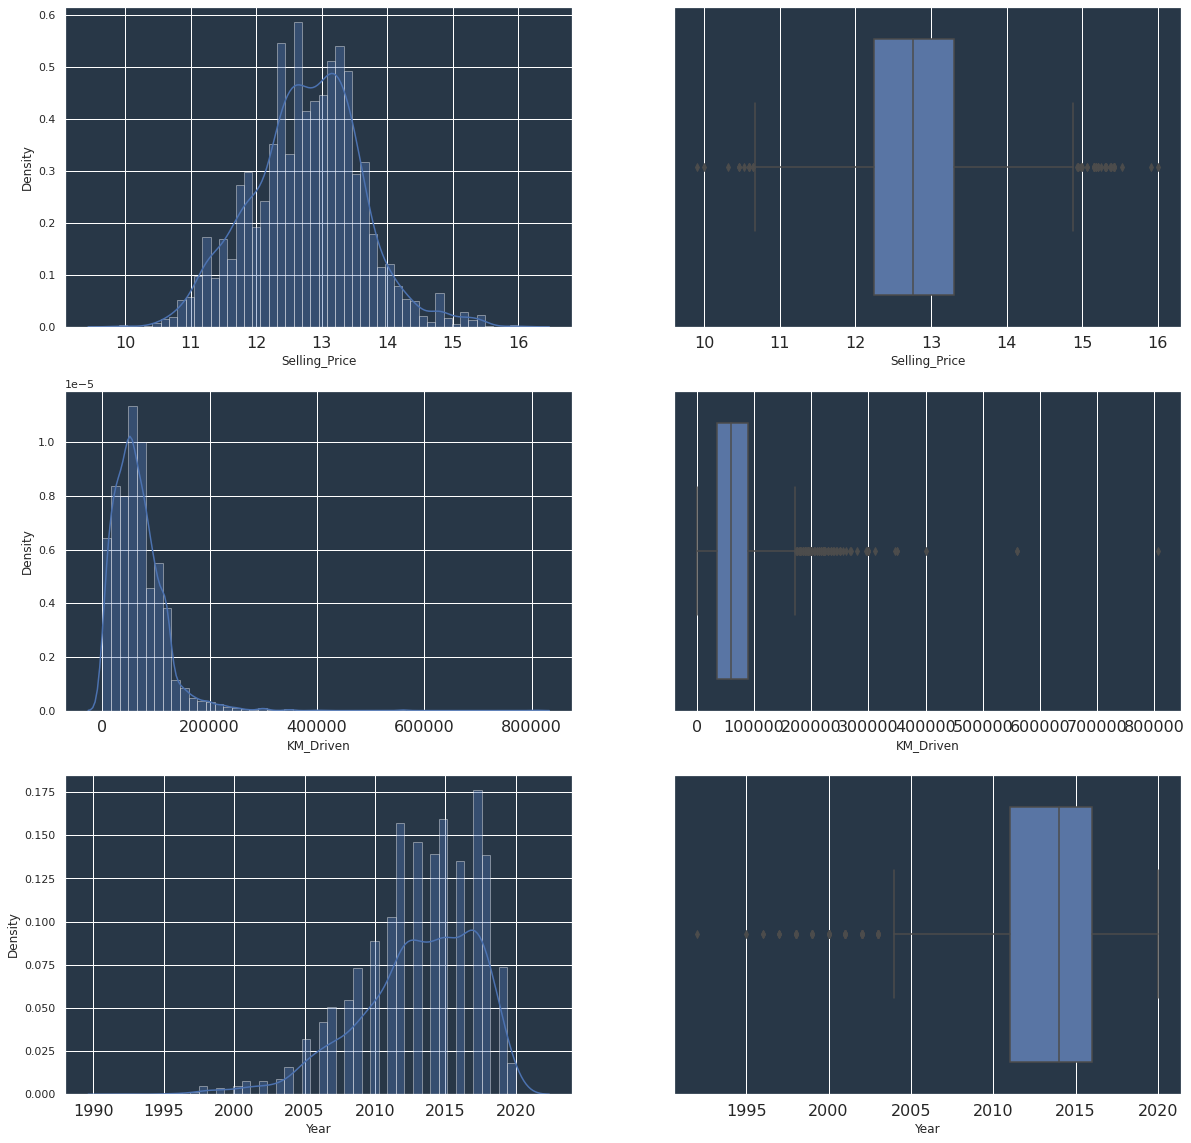

In [31]:
f,axes=plt.subplots(3,2,figsize=(20,20))
sns.distplot(df['Selling_Price'],ax=axes[0,0])
sns.boxplot(df['Selling_Price'],ax=axes[0,1])
sns.distplot(df['KM_Driven'],ax=axes[1,0])
sns.boxplot(df['KM_Driven'],ax=axes[1,1])
sns.distplot(df['Year'],ax=axes[2,0])
sns.boxplot(df['Year'],ax=axes[2,1])

Checking the outliers and Removed it by InterQuantileRange

In [33]:
def outlier(df,col):
    q1,q3 = df[col].quantile(0.25),df[col].quantile(0.75)
    iqr=q3-q1
    lower_fence=q1-1.5*iqr
    upper_fence=q3+1.5*iqr
    outliers=[x for x in df[col] if x < lower_fence or x > upper_fence]
    outliers_removed = df.loc[(df[col]> lower_fence) & (df[col] < upper_fence)]
    return outliers_removed
df2=outlier(df,'Selling_Price')
df2=outlier(df2,'KM_Driven')
df2=outlier(df2,'Year')

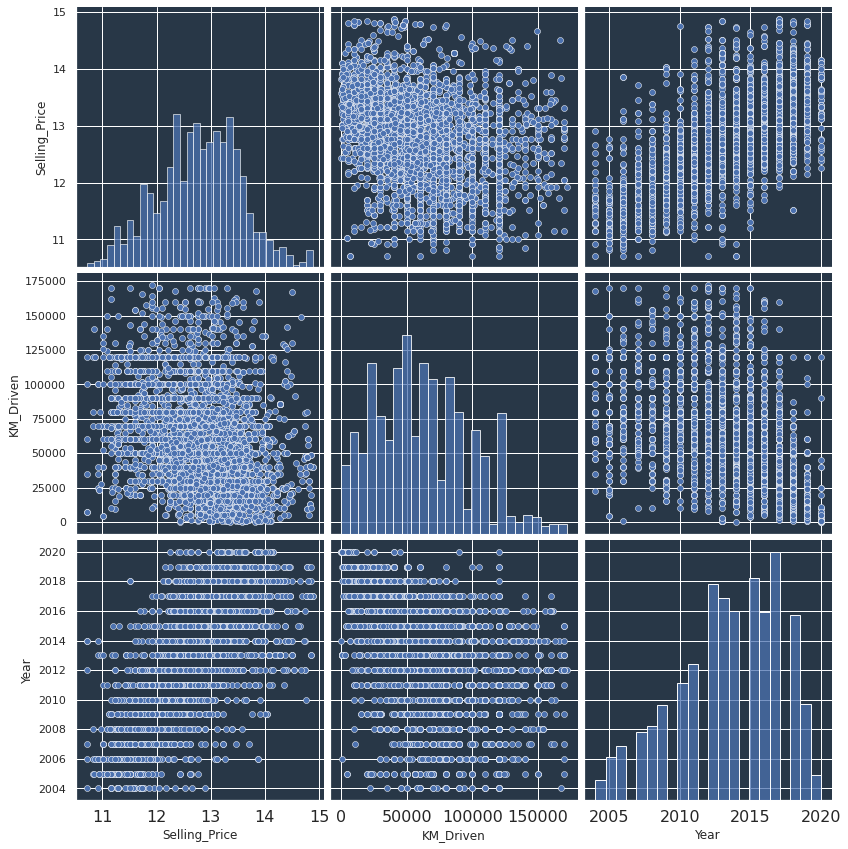

In [34]:
num_features=['Selling_Price','KM_Driven','Year']
sns.pairplot(df2[num_features],height=4)
plt.show()

Pairplot after removing outliers

In [35]:
df2.describe()

,Year,Selling_Price,KM_Driven
count,4069.000000,4069.000000,4069.000000
mean,2013.441386,12.780240,61933.050135
std,3.730580,0.765891,36333.639571
min,2004.000000,10.714418,1.000000
25%,2011.000000,12.301383,34500.000000
50%,2014.000000,12.807653,59100.000000
75%,2017.000000,13.304685,87620.000000
max,2020.000000,14.880221,172000.000000


### multicolliniearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= df2[['KM_Driven','Year']]
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [37]:
vif

,Vif,features
0,3.893752,KM_Driven
1,3.893752,Year


the value of vif is between 1 and 5 so, we can consider this in it

### Creating Dummy Variables

In [38]:
df3= pd.get_dummies(df2,drop_first=True)
df3.head()

,Year,Selling_Price,KM_Driven,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,...,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,2007,11.002100,70000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,2007,11.813030,50000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,2012,13.304685,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2017,12.429216,46000,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,2014,13.017003,141000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [39]:
y=df3['Selling_Price'].values
X=df3.drop(['Selling_Price'],axis=1)

In [40]:
X

,Year,KM_Driven,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,...,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,2007,70000,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,2007,50000,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,2012,100000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2017,46000,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,2014,141000,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4336,2014,80000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4337,2009,83000,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
4338,2016,90000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [41]:
y

array([11.00209984, 11.81303006, 13.30468493, ..., 11.60823564,
       13.67048479, 12.32385568])

### Spliting the dataset into test and train

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=26789)

In [43]:
testdf=pd.DataFrame()
testdf['Actual values']=y_test
X_test.to_csv('Testcases.csv')

### **LinearRegression**

In [44]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [45]:
y_pred_train= lr.predict(X_train)

y_pred_test=lr.predict(X_test)

In [46]:
print("Train R square",lr.score(X_train,y_train))

Train R square 0.9616960384106603


In [47]:
print(y_pred_train[0:5])
print(list(y_train[0:5]))

print(y_pred_test[0:5])
print(list(y_test[0:5]))

[11.61405371 11.80811571 11.32018333 14.66038328 13.09190211]
[11.461632170582678, 11.982929094215963, 11.289781913656018, 14.690979295318174, 13.091902108061824]
[ 1.25239852e+01  1.29629117e+01  1.36114224e+01 -1.63287729e+06
  1.24235342e+01]
[12.2783933071098, 13.093963902882631, 13.652991628466498, 14.253120119399005, 12.345830240069793]


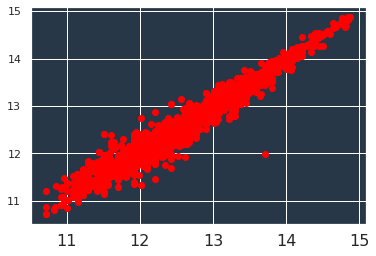

In [48]:
plt.scatter(y_train,y_pred_train,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



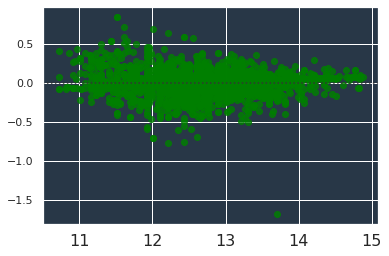

In [49]:
sns.residplot(y_train,y_pred_train,color='green')

In [55]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return rmse
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    print('Root Mean Squared Error(RMSE) of Training is %.2f' % train_error)
    print('Rood Mean Squared Error(RMSE) of Test is %.2f' %  validation_error)



In [56]:
calc_metrics(X_train, y_train, X_test, y_test, lr)

Root Mean Squared Error(RMSE) of Training is 0.15
Rood Mean Squared Error(RMSE) of Test is 205678.76


# **THANK YOU.......))**